# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [1]:
import cv2
import numpy as np
from scipy import signal

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import utils

In [2]:
im1_file = 'kamen.jpg'
im2_file = 'smile.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

<IPython.core.display.Javascript object>


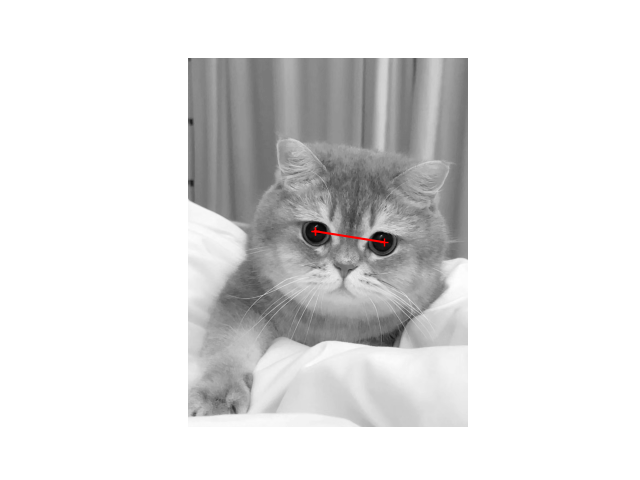

In [3]:
pts_im1 = utils.prompt_eye_selection(im1)

<IPython.core.display.Javascript object>


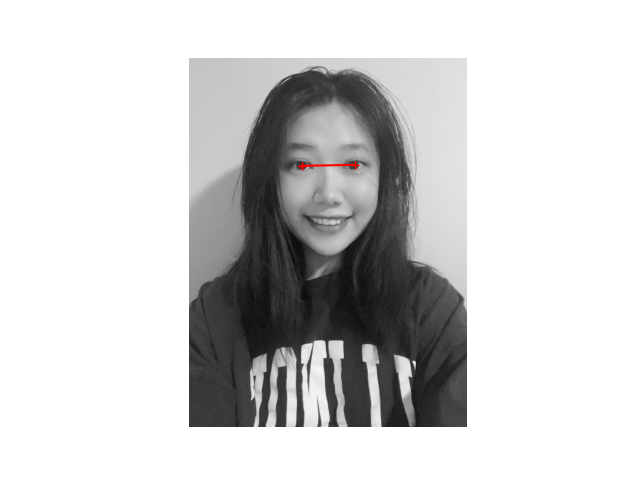

In [4]:
pts_im2 = utils.prompt_eye_selection(im2)

In [5]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

In [6]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

<IPython.core.display.Javascript object>


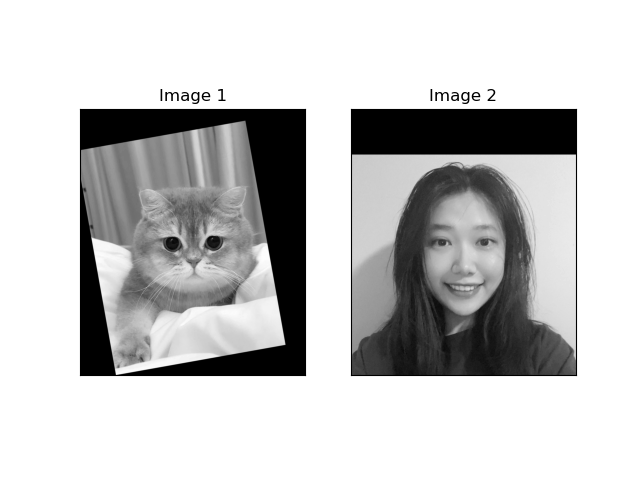

(Text(0.5, 1.0, 'Image 2'), [], [])

In [7]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([])

In [8]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    # your code goes here
    # low pass filter: standard 2D Gaussian kernel
    low_pass_filter = utils.gaussian_kernel(sigma_low, 3*sigma_low)
    low_filtered_img = cv2.filter2D(im2, -1, low_pass_filter)
    
    # high pass filter: impulse kernel - Gaussian kernel
    high_pass_filter = utils.gaussian_kernel(sigma_high, 3*sigma_high)
    high_filtered_img = im1 - cv2.filter2D(im1, -1, high_pass_filter)
    
    # combine the two images
    hybrid_img = low_filtered_img + high_filtered_img
    
    return low_filtered_img, high_filtered_img, hybrid_img
    


In [9]:
sigma_low = 15 # choose parameters that work for your images
sigma_high = 20

# sigma_low = 25 # choose parameters that work for your images
# sigma_high = 30

low_filtered_img, high_filtered_img, hybrid_img = hybridImage(im1, im2, sigma_low, sigma_high)


<IPython.core.display.Javascript object>


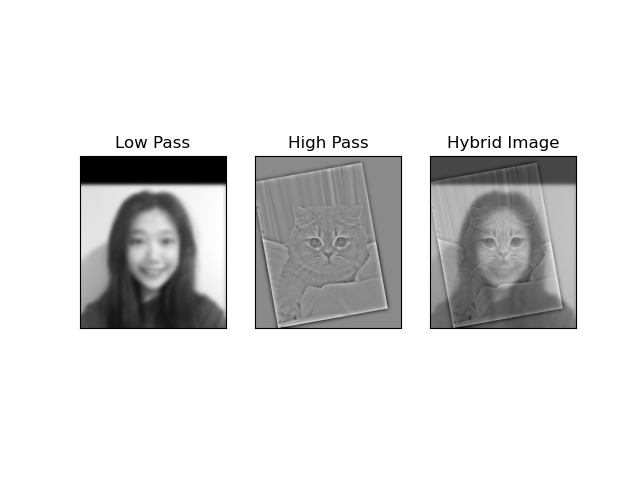

(Text(0.5, 1.0, 'Hybrid Image'), [], [])

In [10]:
# show the low pass, high pass, and hybrid images
fig, axes = plt.subplots(1, 3)
axes[0].imshow(low_filtered_img,cmap='gray')
axes[0].set_title('Low Pass'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(high_filtered_img,cmap='gray')
axes[1].set_title('High Pass'), axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(hybrid_img,cmap='gray')
axes[2].set_title('Hybrid Image'), axes[2].set_xticks([]), axes[2].set_yticks([])


<IPython.core.display.Javascript object>


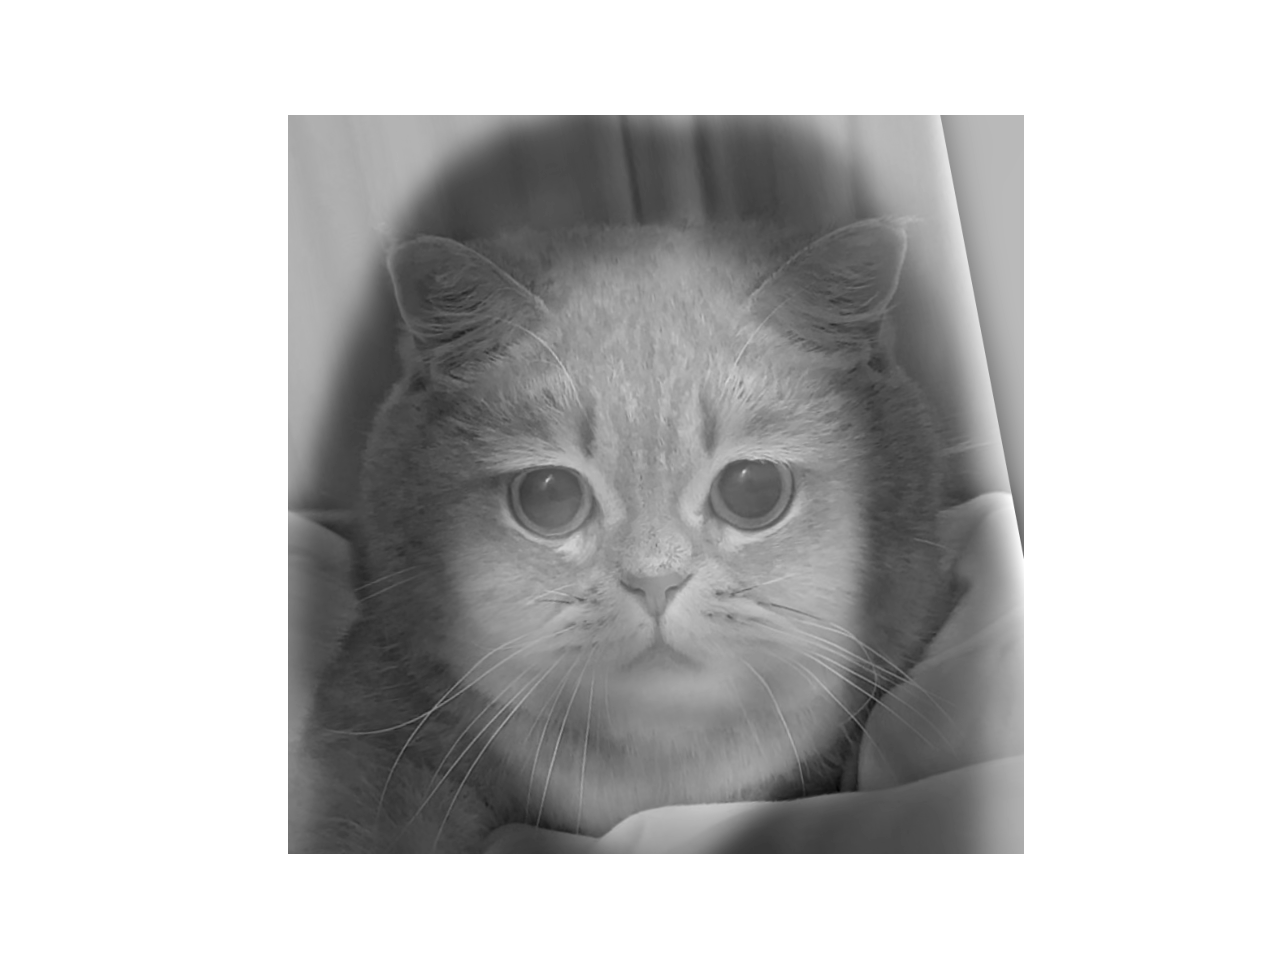

In [14]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(hybrid_img)

### Hybrid image additinal results

<IPython.core.display.Javascript object>


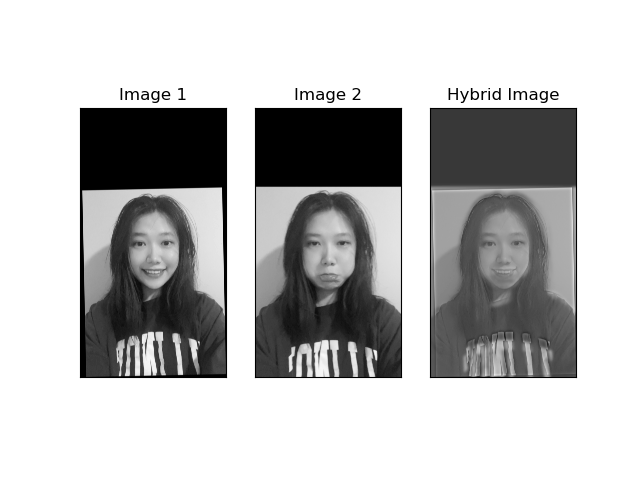

(Text(0.5, 1.0, 'Hybrid Image'), [], [])

In [10]:
# show the input images and hybrid images
fig, axes = plt.subplots(1, 3)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(hybrid_img,cmap='gray')
axes[2].set_title('Hybrid Image'), axes[2].set_xticks([]), axes[2].set_yticks([])


<IPython.core.display.Javascript object>


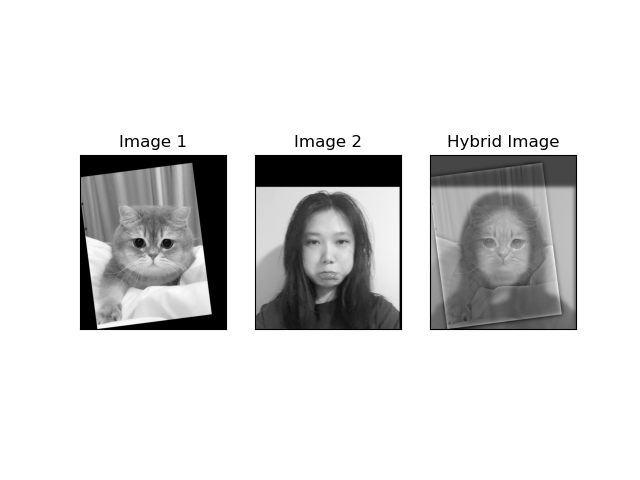

(Text(0.5, 1.0, 'Hybrid Image'), [], [])

In [10]:
# show the input images and hybrid images
fig, axes = plt.subplots(1, 3)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(hybrid_img,cmap='gray')
axes[2].set_title('Hybrid Image'), axes[2].set_xticks([]), axes[2].set_yticks([])

### FFT Analysis

Show the log magnitude of the Fourier transform of the two input images, the filtered images, and the hybrid image.

In [15]:
def fft_img(gray_img):
    return np.log(np.abs(np.fft.fftshift(np.fft.fft2(gray_img))))

<IPython.core.display.Javascript object>


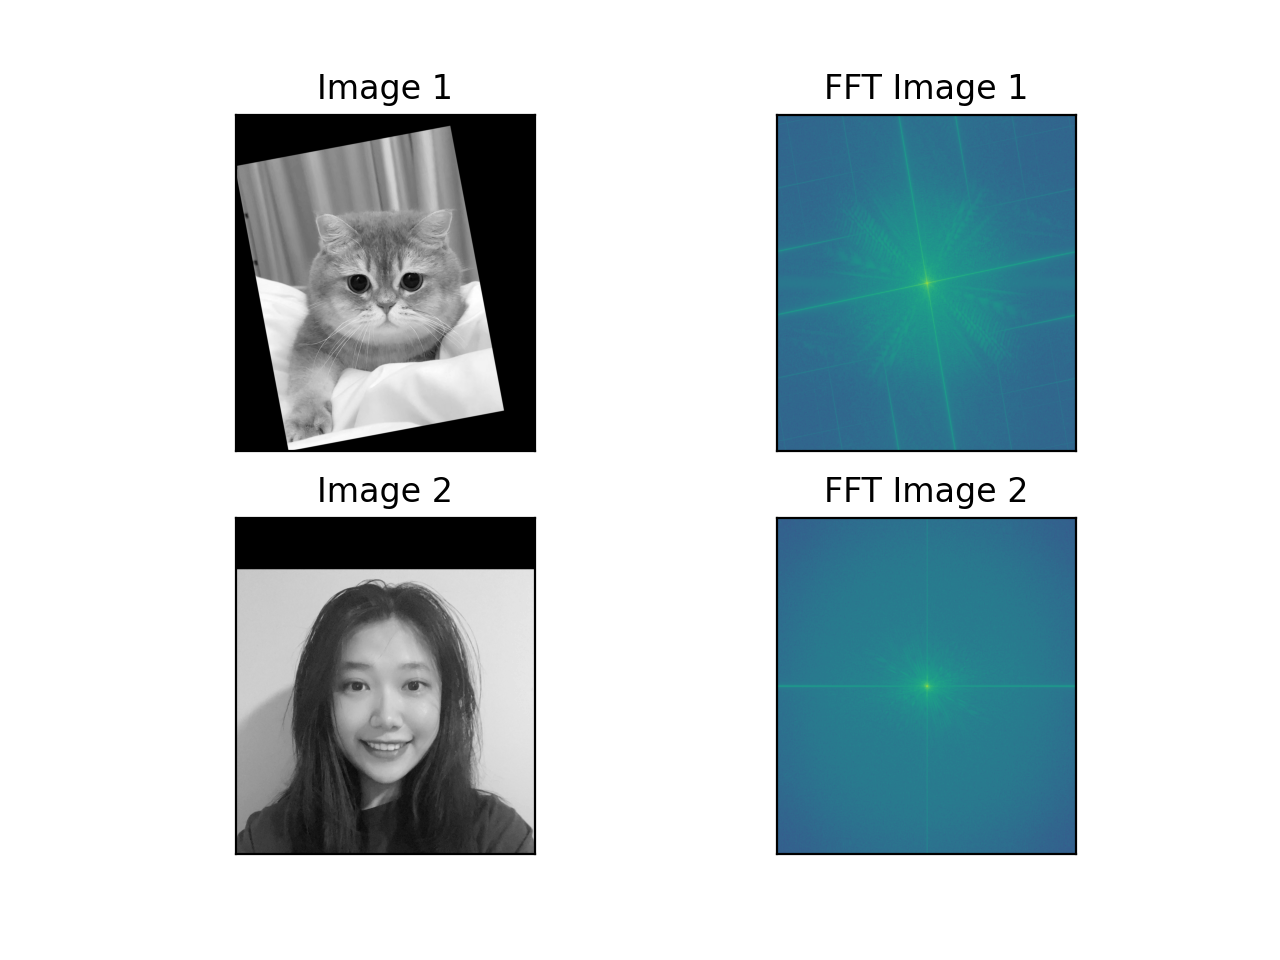

(Text(0.5, 1.0, 'FFT Image 2'), [], [])

In [16]:
# Input images 
fig, axes = plt.subplots(2,2)
axes[0,0].imshow(im1,cmap='gray')
axes[0,0].set_title('Image 1'), axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,1].imshow(fft_img(im1))
axes[0,1].set_title('FFT Image 1'), axes[0,1].set_xticks([]), axes[0,1].set_yticks([])

axes[1,0].imshow(im2,cmap='gray')
axes[1,0].set_title('Image 2'), axes[1,0].set_xticks([]), axes[1,0].set_yticks([])
axes[1,1].imshow(fft_img(im2))
axes[1,1].set_title('FFT Image 2'), axes[1,1].set_xticks([]), axes[1,1].set_yticks([])

<IPython.core.display.Javascript object>


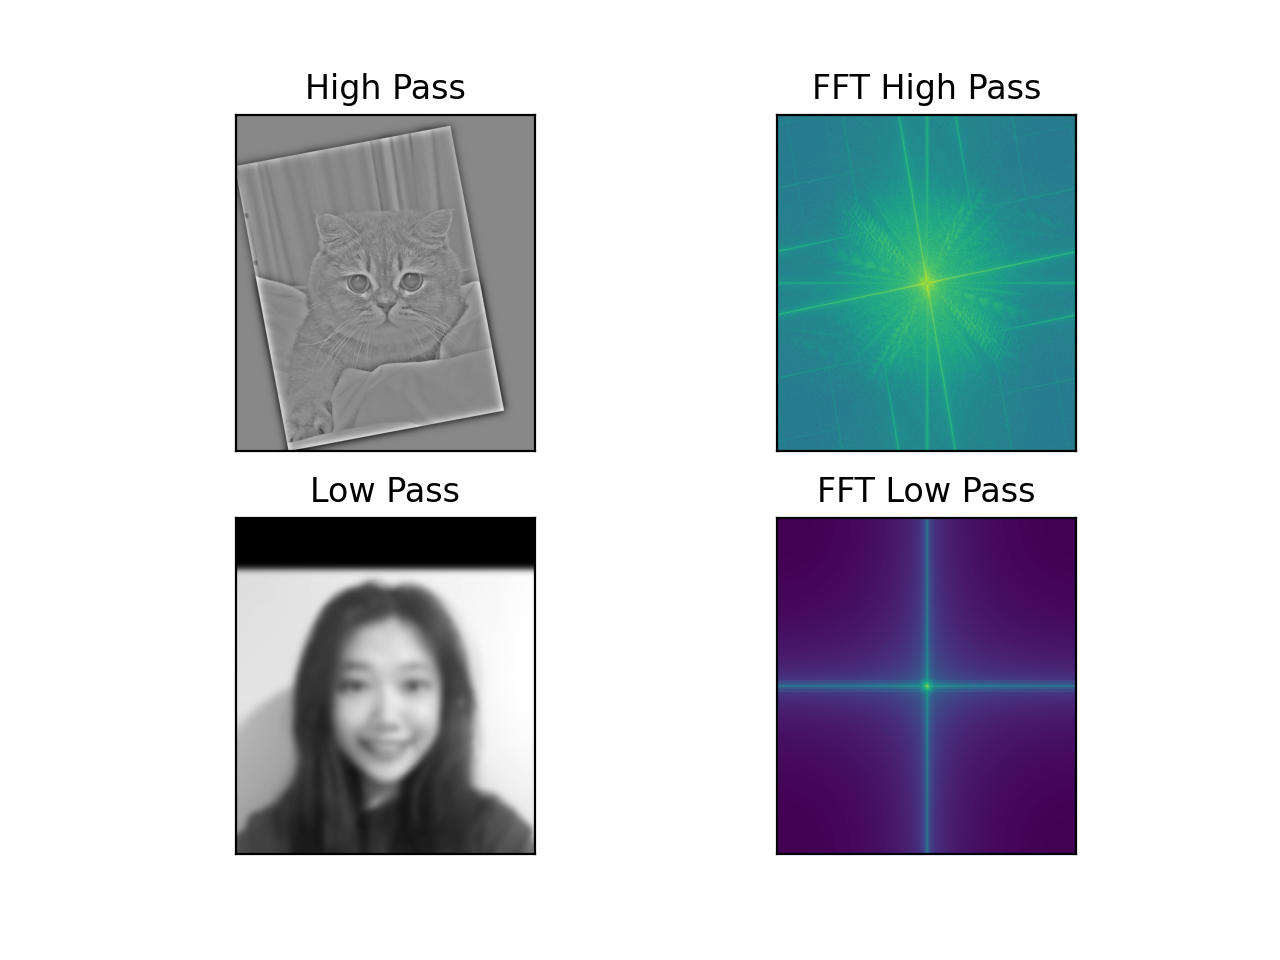

(Text(0.5, 1.0, 'FFT Low Pass'), [], [])

In [17]:
# Filtered images
fig, axes = plt.subplots(2,2)

axes[0,0].imshow(high_filtered_img,cmap='gray')
axes[0,0].set_title('High Pass'), axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,1].imshow(fft_img(high_filtered_img))
axes[0,1].set_title('FFT High Pass'), axes[0,1].set_xticks([]), axes[0,1].set_yticks([])

axes[1,0].imshow(low_filtered_img,cmap='gray')
axes[1,0].set_title('Low Pass'), axes[1,0].set_xticks([]), axes[1,0].set_yticks([])
axes[1,1].imshow(fft_img(low_filtered_img))
axes[1,1].set_title('FFT Low Pass'), axes[1,1].set_xticks([]), axes[1,1].set_yticks([])

<IPython.core.display.Javascript object>


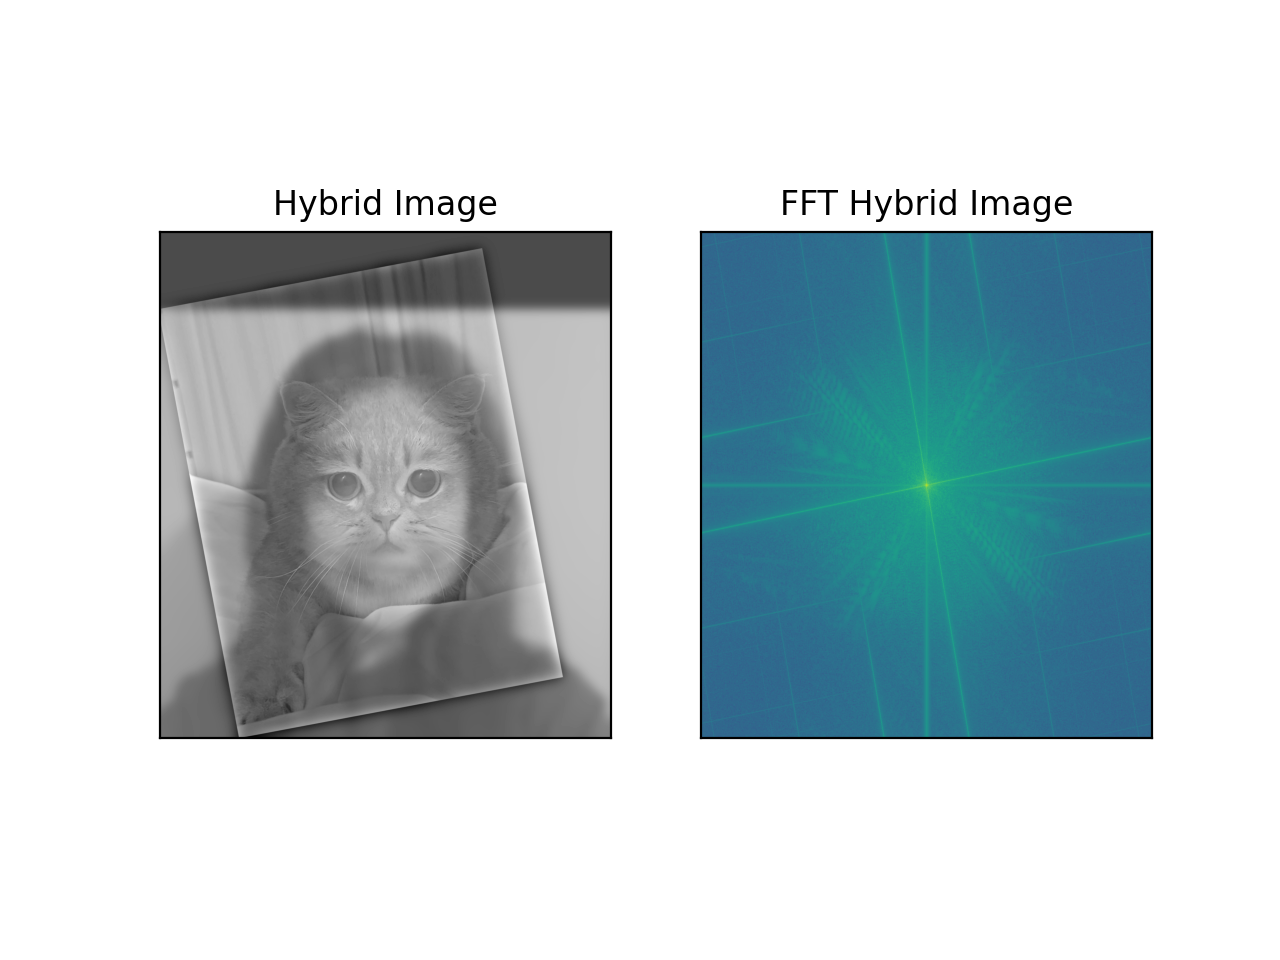

(Text(0.5, 1.0, 'FFT Hybrid Image'), [], [])

In [18]:
# Hybrid image
fig, axes = plt.subplots(1,2)
axes[0].imshow(hybrid_img,cmap='gray')
axes[0].set_title('Hybrid Image'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(fft_img(hybrid_img))
axes[1].set_title('FFT Hybrid Image'), axes[1].set_xticks([]), axes[1].set_yticks([])

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

The goal is to improve the contrast of the images. The poor constrast could be due to blurring in the capture process or due to the intensities not covering the full range. Choose an image (ideally one of yours, but from web is ok) that has poor contrast and fix the problem. Potential fixes include Laplacian filtering, gamma correction, and histogram equalization. Explain why you chose your solution.

In [19]:
img = cv2.imread('contrast.jpg', )
img_hist = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hist[:,:,2] = cv2.equalizeHist(img_hist[:,:,2])
img_hist = cv2.cvtColor(img_hist, cv2.COLOR_HSV2RGB)
ctr_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

<IPython.core.display.Javascript object>


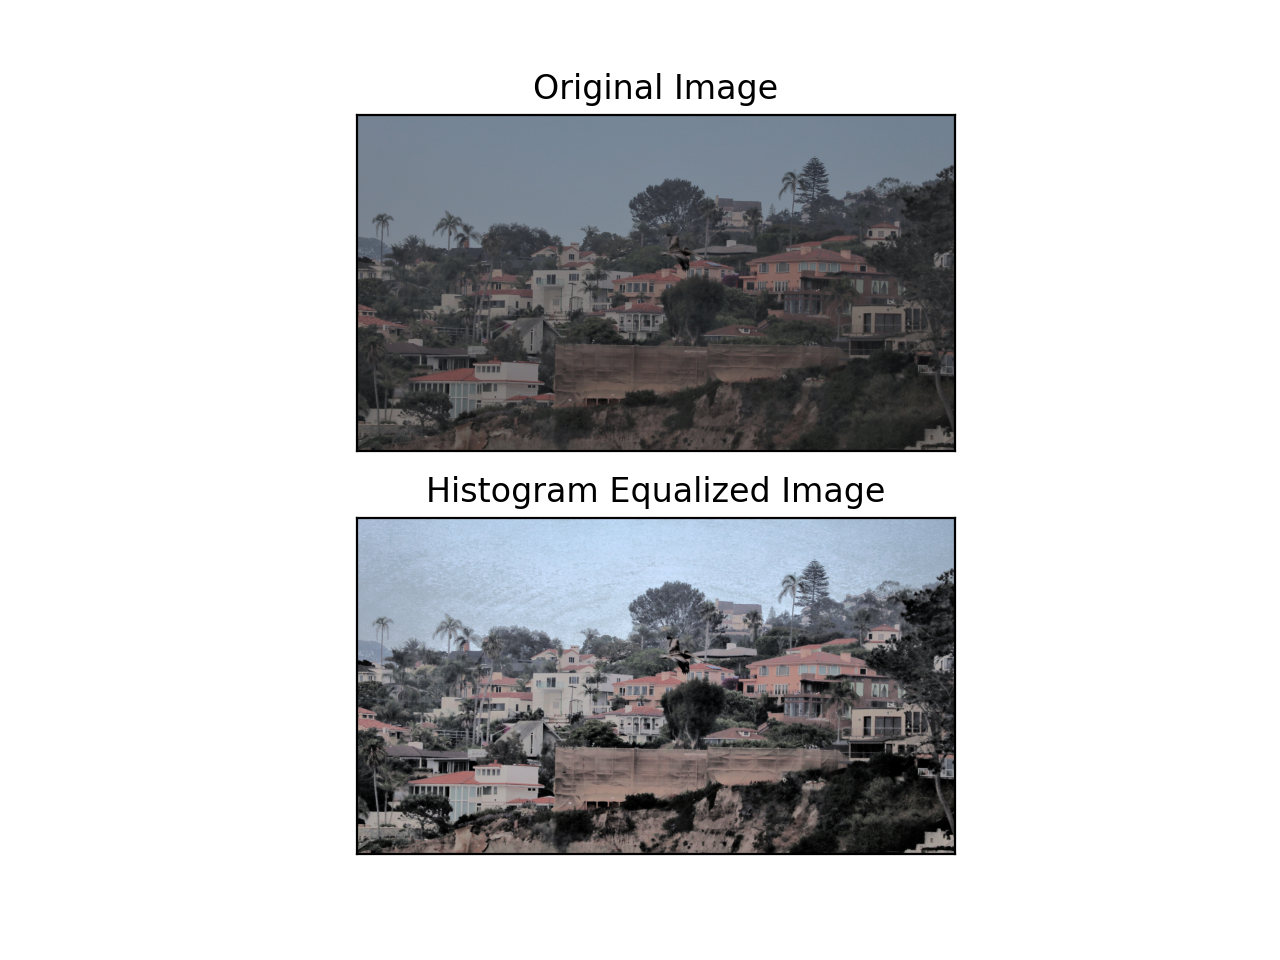

(Text(0.5, 1.0, 'Histogram Equalized Image'), [], [])

In [20]:
fig, axes = plt.subplots(2,1)
axes[0].imshow(ctr_img)
axes[0].set_title('Original Image'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(img_hist)
axes[1].set_title('Histogram Equalized Image'), axes[1].set_xticks([]), axes[1].set_yticks([])

#### Color enhancement 

Now, how to make the colors brighter? You'll find that if you just add some constant to all of the pixel values or multiply them by some factor, you'll make the images lighter, but the colors won't be more vivid. The trick is to work in the correct color space. Convert the images to HSV color space and divide into hue, saturation, and value channels (hsv = cv2.cvtColor(im,cv2.COLOR_BGR2HSV) in OpencCv). Then manipulate the appropriate channel(s) to make the colors (but not the intensity) brighter. Note that you want the values to map between the range defined by the imported library (in OpenCv 0-255), so you shouldn't just add or multiply with some constant. Show this with at least one photograph. Show the original and enhanced images and explain your method.

In [21]:
img = cv2.imread("color.jpg")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # hue, saturation, value

print('initia value:\n', img_hsv[:,:,1])
img_hsv[:,:,1] = img_hsv[:,:,1]*5
v = img_hsv[:,:,1]
print('enhanced value:\n', img_hsv[:,:,1])
img_hsv[:,:,1][v>255]=255

img_hsv = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

initia value:
 [[ 4  4  4 ...  0  0  0]
 [ 4  4  4 ...  0  0  0]
 [ 4  4  4 ...  0  0  0]
 ...
 [18 18 18 ... 34 36 37]
 [18 18 18 ... 35 37 38]
 [18 18 18 ... 39 38 36]]
enhanced value:
 [[ 20  20  20 ...   0   0   0]
 [ 20  20  20 ...   0   0   0]
 [ 20  20  20 ...   0   0   0]
 ...
 [ 90  90  90 ... 170 180 185]
 [ 90  90  90 ... 175 185 190]
 [ 90  90  90 ... 195 190 180]]


<IPython.core.display.Javascript object>


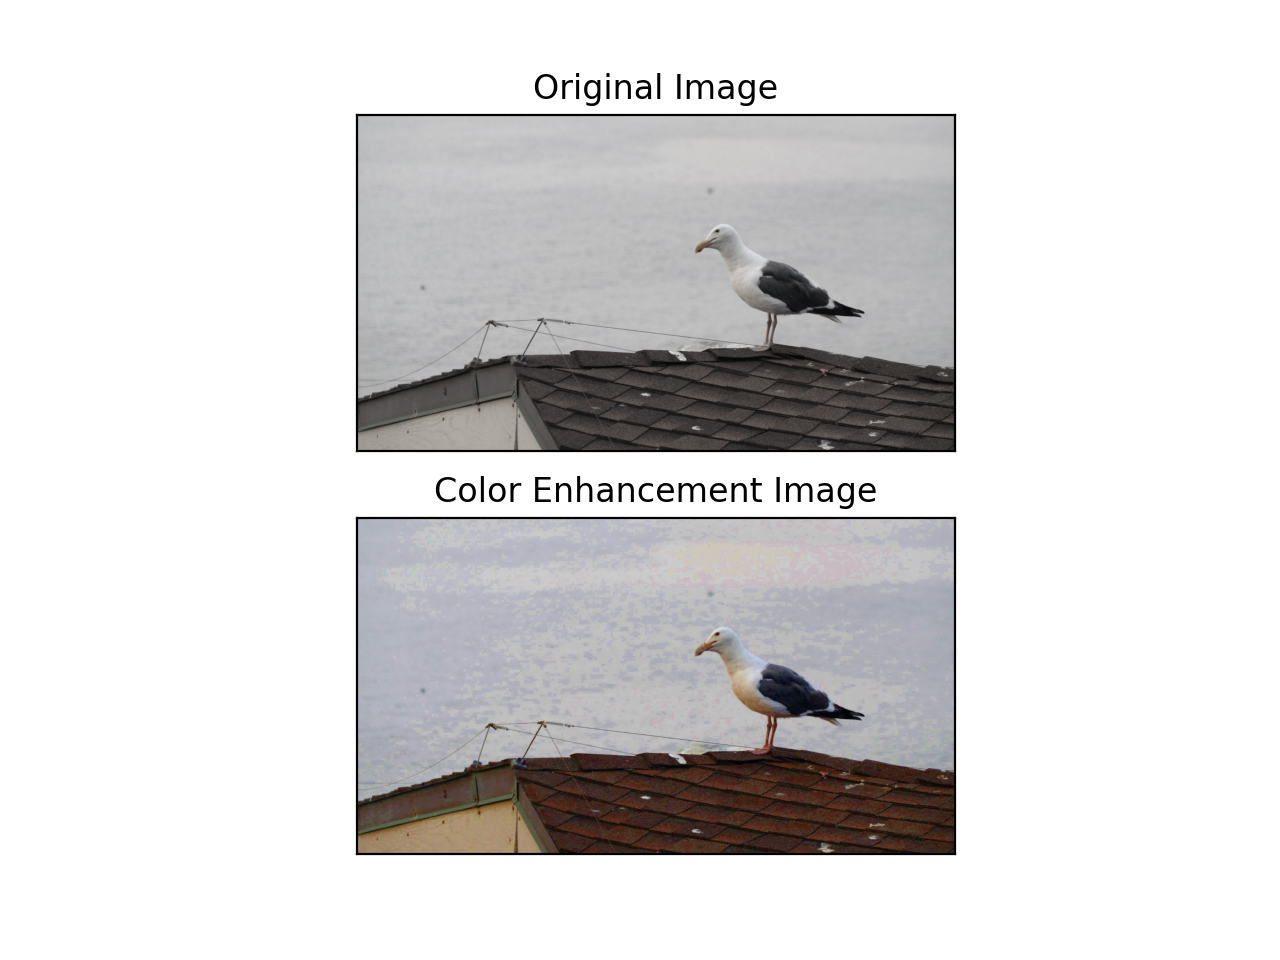

(Text(0.5, 1.0, 'Color Enhancement Image'), [], [])

In [22]:
fig, axes = plt.subplots(2,1)
axes[0].imshow(img)
axes[0].set_title('Original Image'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(img_hsv)
axes[1].set_title('Color Enhancement Image'), axes[1].set_xticks([]), axes[1].set_yticks([])

#### Color shift

Take an image of your choice and create two color-modified versions that are (a) more red; (b) less yellow. Show the original and two modified images and explain how you did it and what color space you've used. Note that **you should not change the luminance** of the photograph (i.e., don't make it more red just by increasing the values of the red channel). In OpenCv use cv2.cvtColor(image, cv2.COLOR_BGR2Lab) for converting between RGB and LAB spaces, in case you want to use LAB space.

In [23]:
img = cv2.imread('banana.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_a = img.copy() # more red
img_b = img.copy() # less yellow
img_a[:,:,0] = img_a[:,:,0] * 0.2
img_b[:,:,0] = img_b[:,:,0] * 2
img_b[:,:,0][img_b[:,:,0]>225] = 225
img, img_a, img_b = cv2.cvtColor(img, cv2.COLOR_HSV2RGB), cv2.cvtColor(img_a, cv2.COLOR_HSV2RGB), cv2.cvtColor(img_b, cv2.COLOR_HSV2RGB)

<IPython.core.display.Javascript object>


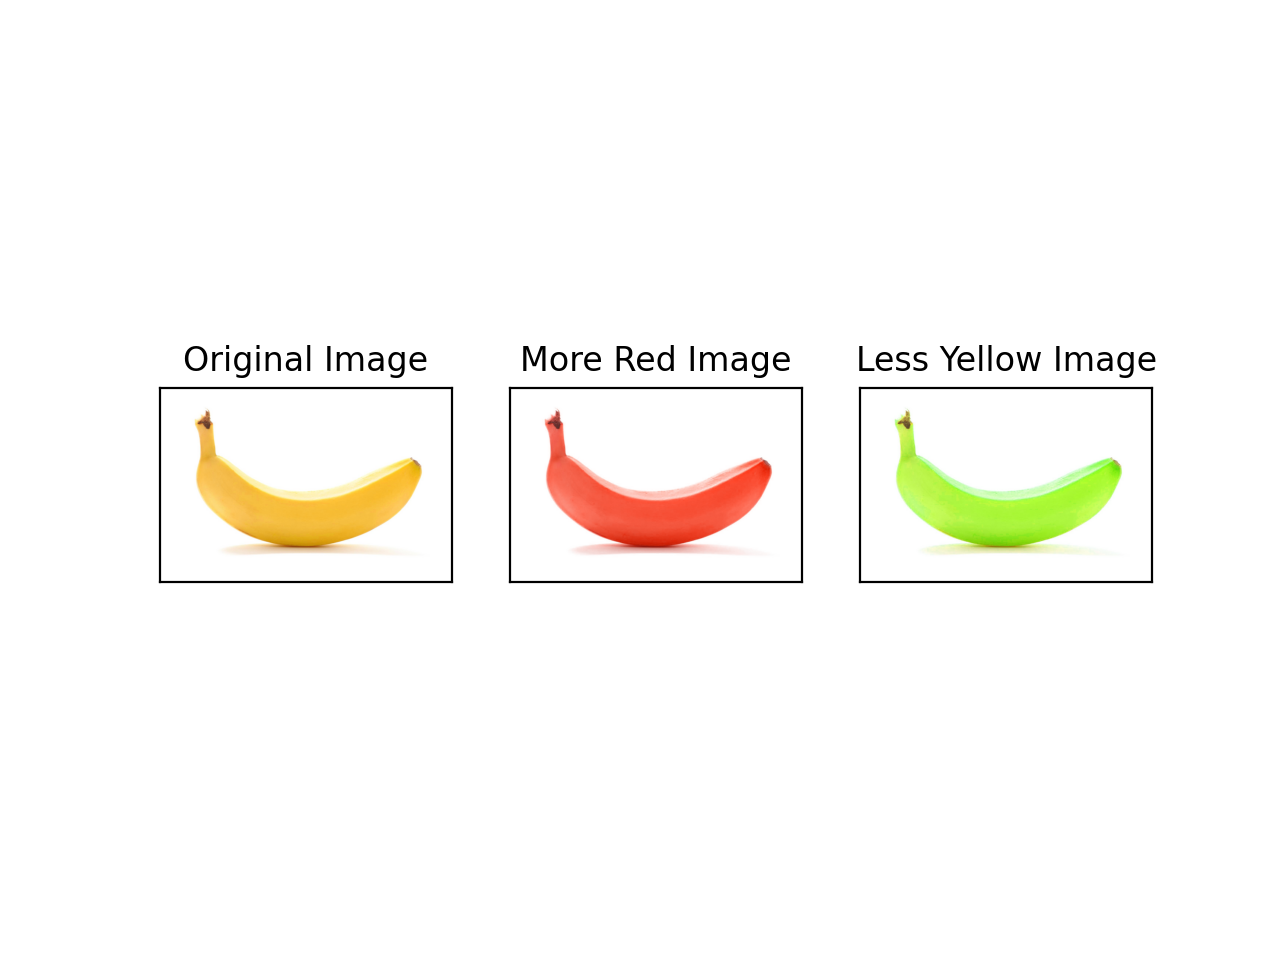

(Text(0.5, 1.0, 'Less Yellow Image'), [], [])

In [24]:
fig, axes = plt.subplots(1,3)
axes[0].imshow(img)
axes[0].set_title('Original Image'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(img_a)
axes[1].set_title('More Red Image'), axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(img_b)
axes[2].set_title('Less Yellow Image'), axes[2].set_xticks([]), axes[2].set_yticks([])